# Import modules

In [1]:
!pip install wordcloud==1.8.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import string

import sys
sys.path.insert(0, "/work/emotions-nlp")

from src.utils.functions import *

# Import Data

In [3]:
# Import Datasets
df = pd.read_csv("/work/emotions-nlp/Data/raw_data/Emotion_final.csv")
dt = pd.read_csv('/work/emotions-nlp/Data/raw_data/text_emotion.csv')

In [4]:
# Print first five rows
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [29]:
dt.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# Dataset Analysis

In [30]:
# Size of our dataset
print("There are {} rows and {} columns in the Kaggle dataset".format(df.shape[0], df.shape[1]))
print("There are {} rows and {} columns in the Data world dataset".format(dt.shape[0], dt.shape[1]))

There are 21456 rows and 7 columns in the Kaggle dataset
There are 40000 rows and 4 columns in the Data world dataset


In [6]:
# Checking if there are missing values 
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [31]:
# Checking if there are missing values 
dt.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [7]:
# Checking the number of different emotions
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [32]:
dt['Emotion'] = dt['sentiment']
dt = dt.drop('sentiment', axis=1)
dt['Emotion'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

In [8]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,ive also made it with both sugar measurements ...,happy
freq,2,7029


In [34]:
dt.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [9]:
df.duplicated().sum()

3

In [37]:
dt['tweet_id'].duplicated().sum()

0

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
# Size of our dataset
print("There are {} rows and {} columns in our dataset".format(df.shape[0], df.shape[1]))

There are 21456 rows and 2 columns in our dataset


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Emotion'>

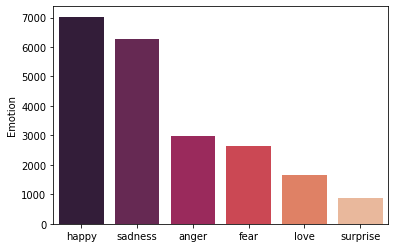

In [12]:
# Histogramme de la fréquence des émotions
sns.barplot(df['Emotion'].value_counts().index,df['Emotion'].value_counts(),palette='rocket')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Emotion'>

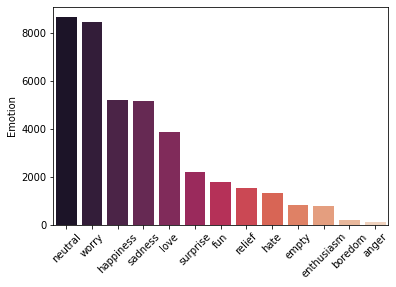

In [50]:
# Histogramme de la fréquence des émotions
plt.xticks(rotation = 45)
sns.barplot(dt['Emotion'].value_counts().index,dt['Emotion'].value_counts(),palette='rocket')

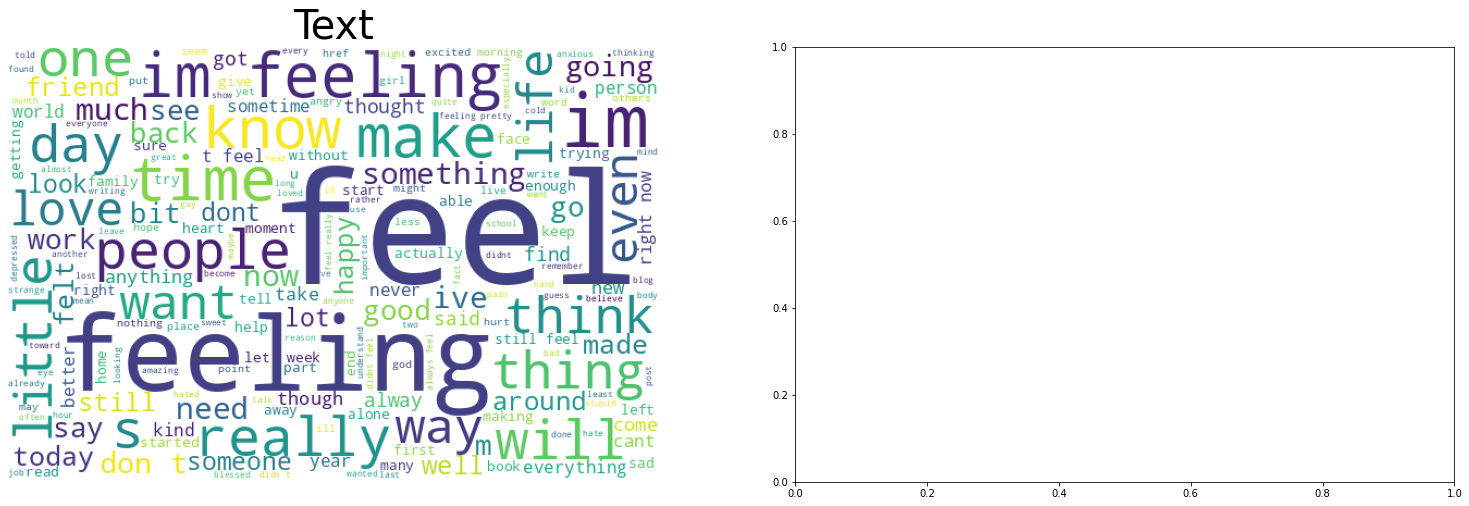

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(df['Text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Text',fontsize=40);

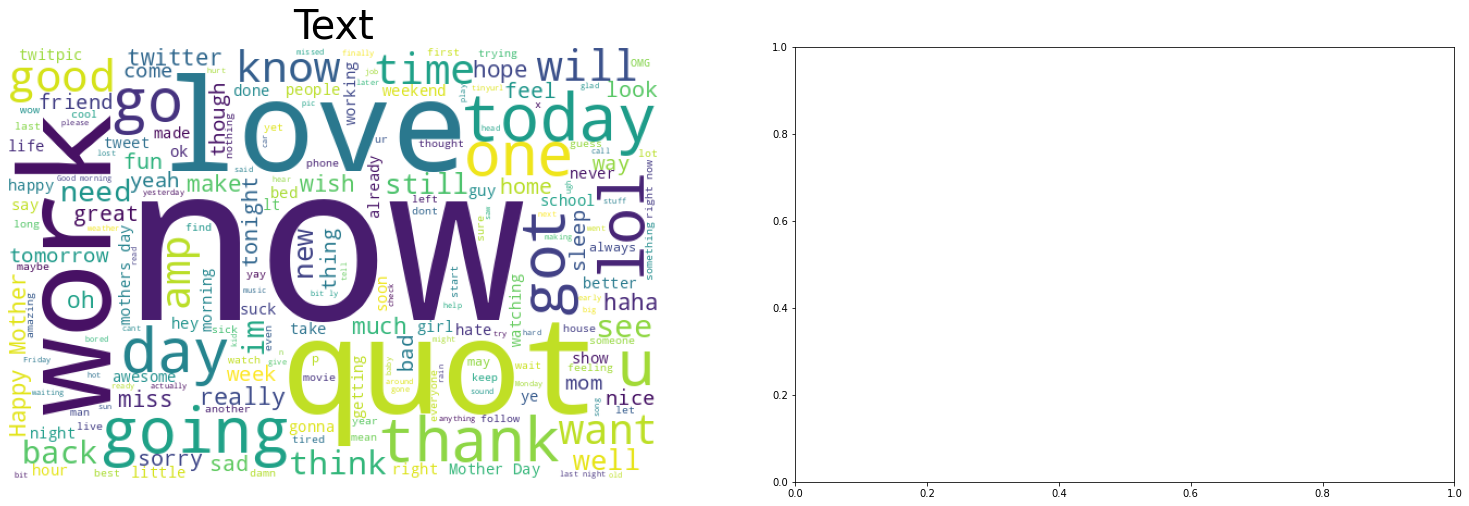

In [39]:
dt['Text'] = dt['content']
dt = dt.drop('content', axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(dt['Text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Text',fontsize=40);

# Text Data Preprocessing

## 1. Data Cleaning

* Make text all lower case 
* Removing Noise (everything that isn't in a standard number ot letter like ponctuation, numerical values, common non-sensical text)
* Tokenization
* Stopword removal
* Stemming/lemmatization

In [14]:
!pip install contractions

In [40]:
import contractions
# Transform contractions into negavtive form
df['clean_text'] = df['Text'].apply(lambda x: contractions.fix(x))
dt['clean_text'] = dt['Text'].apply(lambda x: contractions.fix(x))

In [41]:
import nltk
# Download english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Making text in lower case and removing all noise(links, ponctuation, words containing numbers)
df['clean_text'] = df['clean_text'].apply(lambda x: clean_text(x))
dt['clean_text'] = dt['clean_text'].apply(lambda x: clean_text(x))

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.tokenize import word_tokenize
# Tokenization
df['tokenized'] = df['clean_text'].apply(word_tokenize)
dt['tokenized'] = dt['clean_text'].apply(word_tokenize)

In [46]:
# Remove stopwords from the text
df['stopwords_removed'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
dt['stopwords_removed'] = dt['tokenized'].apply(lambda x: remove_stopwords(x))

In [47]:
# Stemming
df['porter_stemmer'] = df['stopwords_removed'].apply(lambda x: porter_stemmer(x))
dt['porter_stemmer'] = dt['stopwords_removed'].apply(lambda x: porter_stemmer(x))

In [48]:
df.head()

,Text,Emotion,clean_text,tokenized,stopwords_removed,porter_stemmer,binary_emotion
0,i didnt feel humiliated,sadness,i did not feel humiliated,"[i, did, not, feel, humiliated]","[not, feel, humiliated]","[not, feel, humili]",0
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo...",0
2,im grabbing a minute to post i feel greedy wrong,anger,i am grabbing a minute to post i feel greedy w...,"[i, am, grabbing, a, minute, to, post, i, feel...","[grabbing, minute, post, feel, greedy, wrong]","[grab, minut, post, feel, greedi, wrong]",0
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p...",1
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchi]",0


In [49]:
dt.head()

,tweet_id,author,Emotion,Text,clean_text,tokenized,stopwords_removed,porter_stemmer
0,1956967341,xoshayzers,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit...,"[tiffanylue, i, know, i, was, listenin, to, ba...","[tiffanylue, know, listenin, bad, habit, earli...","[tiffanylu, know, listenin, bad, habit, earlie..."
1,1956967666,wannamama,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, with, a, headache, ughhhhwaiti...","[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headach, ughhhhwaitin, call]"
2,1956967696,coolfunky,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]","[funer, ceremonygloomi, friday]"
3,1956967789,czareaquino,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]","[want, hang, friend, soon]"
4,1956968416,xkilljoyx,neutral,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...,"[dannycastillo, we, want, to, trade, with, som...","[dannycastillo, want, trade, someone, houston,...","[dannycastillo, want, trade, someon, houston, ..."


In [53]:
# Add binary sentiment to the dataframe (Feature engineering)
df['binary_emotion'] = df['Emotion'].apply(lambda x: 1 if x in ['happy', 'love', ' surprise'] else 0)
dt['binary_emotion'] = dt['Emotion'].apply(lambda x: 1 if x in ['happiness', 'love', ' surprise', 'neutral', 'fun', 'relief', 'enthusiasm'] else 0)

In [54]:
df.head()

,Text,Emotion,clean_text,tokenized,stopwords_removed,porter_stemmer,binary_emotion
0,i didnt feel humiliated,sadness,i did not feel humiliated,"[i, did, not, feel, humiliated]","[not, feel, humiliated]","[not, feel, humili]",0
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hope, around, someo...",0
2,im grabbing a minute to post i feel greedy wrong,anger,i am grabbing a minute to post i feel greedy w...,"[i, am, grabbing, a, minute, to, post, i, feel...","[grabbing, minute, post, feel, greedy, wrong]","[grab, minut, post, feel, greedi, wrong]",0
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalg, fireplac, know, still, p...",1
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchi]",0


In [56]:
dt.head()

,tweet_id,author,Emotion,Text,clean_text,tokenized,stopwords_removed,porter_stemmer,binary_emotion
0,1956967341,xoshayzers,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit...,"[tiffanylue, i, know, i, was, listenin, to, ba...","[tiffanylue, know, listenin, bad, habit, earli...","[tiffanylu, know, listenin, bad, habit, earlie...",0
1,1956967666,wannamama,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, with, a, headache, ughhhhwaiti...","[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headach, ughhhhwaitin, call]",0
2,1956967696,coolfunky,sadness,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]","[funer, ceremonygloomi, friday]",0
3,1956967789,czareaquino,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]","[want, hang, friend, soon]",1
4,1956968416,xkilljoyx,neutral,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...,"[dannycastillo, we, want, to, trade, with, som...","[dannycastillo, want, trade, someone, houston,...","[dannycastillo, want, trade, someon, houston, ...",1


In [69]:
# Saving clean data to a new csv file 
df.to_csv('/work/emotions-nlp/Data/intermediate_data/clean_data.csv')
dt = dt[['Emotion', 'Text', 'clean_text', 'tokenized', 'stopwords_removed', 'porter_stemmer', 'binary_emotion']]
dt.to_csv('/work/emotions-nlp/Data/intermediate_data/clean_data2.csv')

combined_df = df.append(dt)
combined_df.to_csv('/work/emotions-nlp/Data/intermediate_data/clean_data_combined.csv')

In [154]:
def find_most_common_word(column):
    corpus = []
    for sentence in column:
        for word in sentence:
            corpus.append(word)
    from nltk import FreqDist
    fdist = FreqDist(corpus)
    most_freq_words = pd.DataFrame(fdist.most_common(10), columns=["word", "frequence"])
    return most_freq_words

most_freq_word_k = find_most_common_word(df['stopwords_removed'])
most_freq_word_dw = find_most_common_word(dt['stopwords_removed'])
most_freq_word_combined = find_most_common_word(combined_df['stopwords_removed'])

most_freq_word_k.to_csv('/work/emotions-nlp/Data/freq_words/most_freq_word_k.csv')
most_freq_word_dw.to_csv('/work/emotions-nlp/Data/freq_words/most_freq_word_dw.csv')
most_freq_word_combined.to_csv('/work/emotions-nlp/Data/freq_words/most_freq_word_combined.csv')

NameError: name 'st' is not defined

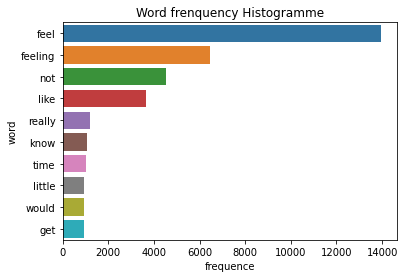

In [152]:
sns.barplot(data=most_freq_words,x="frequence", y='word')
plt.title('Word frenquency Histogramme')
st.pyplot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63592523-ebbf-40aa-802d-b9939a22188a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>